In [106]:
import pandas as pd 
import numpy as n
df2=pd.read_csv(r"C:\Users\amrut\Desktop\tmdb_5000_movies.csv")
df1=pd.read_csv(r"C:\Users\amrut\Desktop\tmdb_5000_credits.csv")

In [107]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [108]:
df2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [109]:
df1.columns = ['id','tittle','cast','crew']
big_table= df2.merge(df1,on='id')
big_table.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [110]:
columns_to_remove = ["budget","homepage","keywords","original_language", "tagline", "title","overview", "production_countries", "production_companies","release_date","revenue","runtime","spoken_languages","tagline","title"]

movies = big_table.drop(columns=columns_to_remove, axis=1)
movies.columns

Index(['genres', 'id', 'original_title', 'popularity', 'status',
       'vote_average', 'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [111]:
# Define your criteria for a "popular" movie
vote_average_threshold = movies['vote_average'].mean()
vote_count_threshold = movies['vote_count'].mean()
popularity_threshold = movies['popularity'].mean()

# Create the "is_popular" column based on the criteria
movies['is_popular'] = (
    (movies['vote_average'] >= vote_average_threshold) &
    (movies['vote_count'] >= vote_count_threshold) &
    (movies['popularity'] >= popularity_threshold)
).astype(int)

In [112]:
import ast

def convert_genres(text):
    l = []
    for i in ast.literal_eval(text):
        l.append(i['name'])
    return l

In [113]:
movies['genres'] = movies['genres'].apply(convert_genres)

In [114]:
movies.head(2)

,genres,id,original_title,popularity,status,vote_average,vote_count,tittle,cast,crew,is_popular
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,Released,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",1
1,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,Released,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",1


In [115]:
def convert_cast(text):
    l = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            l.append(i['name'])
        counter += 1
    return l

In [116]:
movies['cast'] = movies['cast'].apply(convert_cast)
movies.head(2)

,genres,id,original_title,popularity,status,vote_average,vote_count,tittle,cast,crew,is_popular
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,Released,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",1
1,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,Released,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",1


In [117]:
def fetch_director(text):
    l = []
    for i in ast.literal_eval(text):
        if i['job'] == "Director":
            l.append(i['name'])
            break
    return l

In [118]:
movies['Director'] = movies['crew'].apply(fetch_director)
movies.drop(['crew','status'],axis="columns",inplace=True)
movies.head(2)

,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,is_popular,Director
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",1,[James Cameron]
1,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",1,[Gore Verbinski]


In [119]:
movies.head(2)

,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,is_popular,Director
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",1,[James Cameron]
1,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",1,[Gore Verbinski]


In [120]:
movies['Director'] = movies['Director'].apply(lambda x: ''.join(x))
movies['genres'] = movies['genres'].apply(lambda x: ''.join(x))
movies['cast'] = movies['cast'].apply(lambda x: ''.join(x))
movies

,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,is_popular,Director
0,ActionAdventureFantasyScience Fiction,19995,Avatar,150.437577,7.2,11800,Avatar,Sam WorthingtonZoe SaldanaSigourney Weaver,1,James Cameron
1,AdventureFantasyAction,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,Johnny DeppOrlando BloomKeira Knightley,1,Gore Verbinski
2,ActionAdventureCrime,206647,Spectre,107.376788,6.3,4466,Spectre,Daniel CraigChristoph WaltzLéa Seydoux,1,Sam Mendes
3,ActionCrimeDramaThriller,49026,The Dark Knight Rises,112.312950,7.6,9106,The Dark Knight Rises,Christian BaleMichael CaineGary Oldman,1,Christopher Nolan
4,ActionAdventureScience Fiction,49529,John Carter,43.926995,6.1,2124,John Carter,Taylor KitschLynn CollinsSamantha Morton,1,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...
4798,ActionCrimeThriller,9367,El Mariachi,14.269792,6.6,238,El Mariachi,Carlos GallardoJaime de HoyosPeter Marquardt,0,Robert Rodriguez
4799,ComedyRomance,72766,Newlyweds,0.642552,5.9,5,Newlyweds,Edward BurnsKerry BishéMarsha Dietlein,0,Edward Burns
4800,ComedyDramaRomanceTV Movie,231617,"Signed, Sealed, Delivered",1.444476,7.0,6,"Signed, Sealed, Delivered",Eric MabiusKristin BoothCrystal Lowe,0,Scott Smith
4801,,126186,Shanghai Calling,0.857008,5.7,7,Shanghai Calling,Daniel HenneyEliza CoupeBill Paxton,0,Daniel Hsia


In [121]:
from sklearn.preprocessing import LabelEncoder
le_genres = LabelEncoder()
le_id = LabelEncoder()
le_original_title = LabelEncoder()
le_tittle  = LabelEncoder()
le_cast  = LabelEncoder()
le_Director  = LabelEncoder()

In [122]:
movies['genres']=le_genres.fit_transform(movies['genres'])
movies['id']=le_id.fit_transform(movies['id'])
movies['original_title']=le_original_title.fit_transform(movies['original_title'])
movies['tittle']=le_tittle.fit_transform(movies['tittle'])
movies['cast']=le_cast.fit_transform(movies['cast'])
movies['Director']=le_Director.fit_transform(movies['Director'])
movies



,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,is_popular,Director
0,64,2702,372,150.437577,7.2,11800,379,3932,1,886
1,332,131,2665,139.082615,6.9,4500,2648,2269,1,770
2,33,4313,3188,107.376788,6.3,4466,3181,960,1,1972
3,135,3464,3594,112.312950,7.6,9106,3612,794,1,361
4,76,3481,1891,43.926995,6.1,2124,1901,4287,1,94
...,...,...,...,...,...,...,...,...,...,...
4798,141,1283,1138,14.269792,6.6,238,1145,640,0,1896
4799,527,3762,2463,0.642552,5.9,5,2442,1232,0,606
4800,482,4383,3081,1.444476,7.0,6,3072,1330,0,1998
4801,0,4082,3034,0.857008,5.7,7,3021,972,0,440


In [123]:
# x=movies.drop('genres',axis='columns')
# y=movies['genres']
x=movies.drop(['is_popular'],axis='columns')
y=movies['is_popular']

In [124]:
x['vote_average'] = x['vote_average'].astype(int)
x.dtypes
x

,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,Director
0,64,2702,372,150.437577,7,11800,379,3932,886
1,332,131,2665,139.082615,6,4500,2648,2269,770
2,33,4313,3188,107.376788,6,4466,3181,960,1972
3,135,3464,3594,112.312950,7,9106,3612,794,361
4,76,3481,1891,43.926995,6,2124,1901,4287,94
...,...,...,...,...,...,...,...,...,...
4798,141,1283,1138,14.269792,6,238,1145,640,1896
4799,527,3762,2463,0.642552,5,5,2442,1232,606
4800,482,4383,3081,1.444476,7,6,3072,1330,1998
4801,0,4082,3034,0.857008,5,7,3021,972,440


In [125]:
x['vote_average'] = x['vote_average'].astype(int)
x.dtypes
x.isnull().any()

genres            False
id                False
original_title    False
popularity        False
vote_average      False
vote_count        False
tittle            False
cast              False
Director          False
dtype: bool

In [126]:
y.isnull().any()

False

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

# Create a new DataFrame with scaled values and column names
x = pd.DataFrame(scaled_data, columns=x.columns)
x

,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,Director
0,-1.712060,0.217092,-1.463003,4.053183,1.122229,8.999729,-1.458104,1.170248,-0.459022
1,-0.794803,-1.637208,0.191475,3.696258,0.289143,3.086200,0.179399,-0.045445,-0.627444
2,-1.818160,1.379005,0.568838,2.699638,0.289143,3.058657,0.564057,-1.002356,1.117761
3,-1.469055,0.766675,0.861780,2.854798,1.122229,6.817394,0.875103,-1.123706,-1.221278
4,-1.670988,0.778936,-0.366993,0.705198,0.289143,1.161467,-0.359700,1.429762,-1.608940
...,...,...,...,...,...,...,...,...,...
4798,-1.448520,-0.806343,-0.910308,-0.227028,0.289143,-0.366329,-0.905293,-1.236284,1.007415
4799,-0.127396,0.981604,0.045725,-0.655378,-0.543943,-0.555076,0.030732,-0.803517,-0.865559
4800,-0.281413,1.429492,0.491633,-0.630170,1.122229,-0.554266,0.485393,-0.731877,1.155510
4801,-1.931106,1.212400,0.457721,-0.648637,-0.543943,-0.553456,0.448588,-0.993584,-1.106577


In [128]:
iqr_multiplier = 1.5

movies_no_outliers = movies.copy()

for column in x:
    q1 = movies[column].quantile(0.25)
    q3 = movies[column].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr
    
    movies_no_outliers = movies_no_outliers[(movies_no_outliers[column] >= lower_bound) & (movies_no_outliers[column] <= upper_bound)]

print(movies_no_outliers)

      genres    id  original_title  popularity  vote_average  vote_count  \
10       338   494            3320   57.925623           5.4        1400   
15       321   727            3546   53.978602           6.3        1630   
21         2  2729            2878   37.668301           6.2        1398   
23       331   702            3703   42.990906           5.8        1303   
54       263  4006            3704   51.692953           6.6        1736   
...      ...   ...             ...         ...           ...         ...   
4798     141  1283            1138   14.269792           6.6         238   
4799     527  3762            2463    0.642552           5.9           5   
4800     482  4383            3081    1.444476           7.0           6   
4801       0  4082            3034    0.857008           5.7           7   
4802     601  2916            2406    1.929883           6.3          16   

      tittle  cast  is_popular  Director  
10      3317   515           0       271  
1

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [131]:

# 5. Train the k-NN classifier.
k = 5  # Choose the number of neighbors.
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x_train, y_train)

# 6. Evaluate the model's performance on the testing data.
y_pred = knn_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9268138801261829


In [132]:
from sklearn.metrics import accuracy_score, classification_report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1249
           1       0.87      0.77      0.82       336

    accuracy                           0.93      1585
   macro avg       0.91      0.87      0.89      1585
weighted avg       0.93      0.93      0.93      1585



In [133]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)

print(f'Precision: {precision}')

Precision: 0.8716216216216216


In [134]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

print(f'Recall: {recall}')

Recall: 0.7678571428571429


In [135]:
from sklearn.metrics import f1_score
f1_score_value = f1_score(y_test, y_pred)

print(f'F1 Score: {f1_score_value}')

F1 Score: 0.8164556962025317


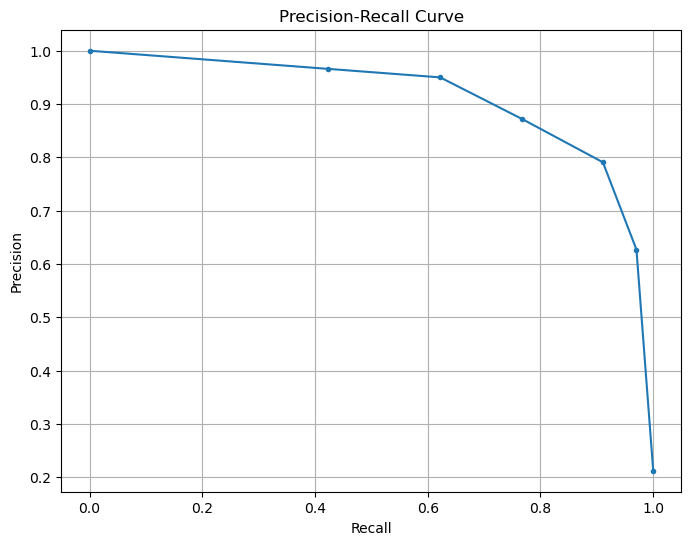

In [136]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = knn_classifier.predict_proba(x_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

In [137]:
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

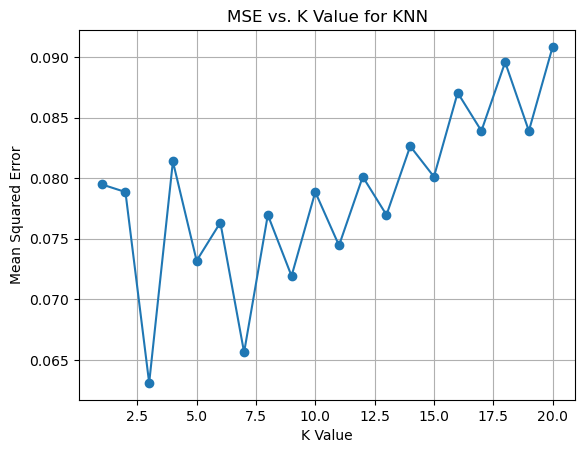

In [138]:
# Define a range of k values to test
k_values = range(1, 21)

# Initialize lists to store MSE values for different k
mse_values = []

# Train KNN models for different values of k and calculate MSE
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)
    y_pred = knn_classifier.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the MSE values for different k
plt.plot(k_values, mse_values, marker='o')
plt.title('MSE vs. K Value for KNN')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [139]:

# 5. Train the k-NN classifier.
k = 3  # Choose the number of neighbors.
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x_train, y_train)

# 6. Evaluate the model's performance on the testing data.
y_pred = knn_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9369085173501577


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust the number of neighbors (k)
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Choose distance metrics
}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)  # cv is the number of cross-validation folds

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test accuracy:", test_score)


Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7}
Best cross-validation score: 0.9440617060942978
Test accuracy: 0.9425867507886435
